In [3]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('/content/titanic_dataset.csv', usecols=['Age', 'Fare', 'Survived'])
df

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875
...,...,...,...
413,0,NaN,8.0500
414,1,39.0,108.9000
415,0,38.5,7.2500
416,0,NaN,8.0500


In [5]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [7]:
df['Fare'].fillna(df['Fare'].mean(), inplace = True)

In [8]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [9]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [11]:
x_train

,Age,Fare
336,32.00000,13.0000
31,24.00000,31.5000
84,30.27259,10.7083
287,24.00000,82.2667
317,19.00000,10.5000
...,...,...
71,21.00000,7.8958
106,21.00000,7.8208
270,46.00000,75.2417
348,24.00000,13.5000


## Given below are histplot and QQ plot which helps in checking normalization of dataset

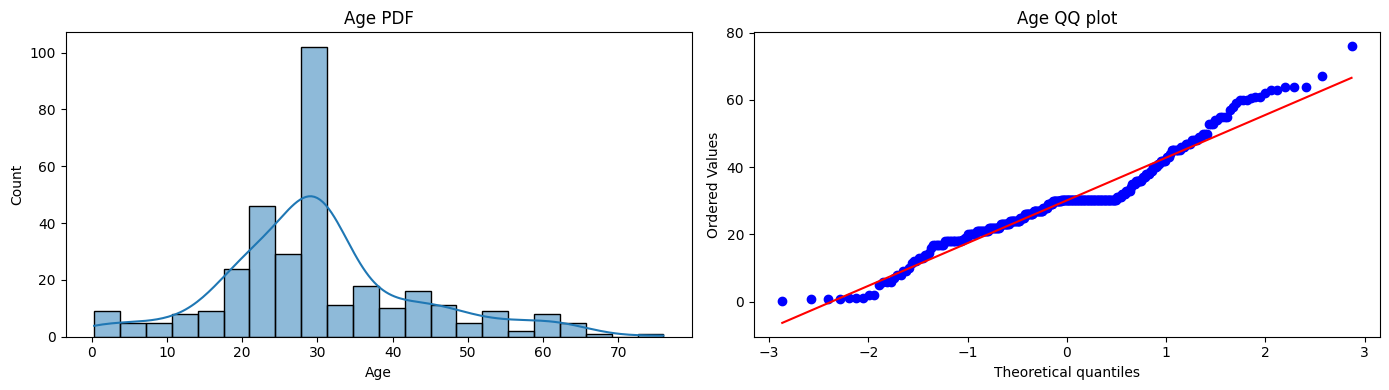

In [12]:
plt.figure(figsize=(14,4))

# Subplot 1: Age PDF
plt.subplot(121)
sns.histplot(x_train['Age'], kde=True)  # Or use sns.kdeplot for KDE only
plt.title('Age PDF')

# Subplot 2: Age QQ plot
plt.subplot(122)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ plot')

plt.tight_layout()
plt.show()

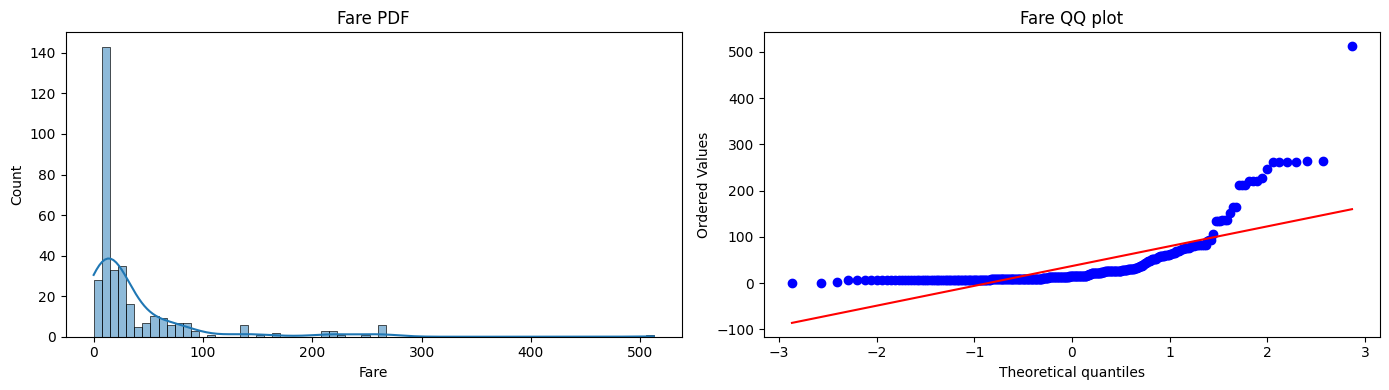

In [13]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(x_train['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ plot')

plt.tight_layout()
plt.show()

In [14]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

## Results on regular data

In [15]:
clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y1_pred = clf2.predict(x_test)

print("acc LR", accuracy_score(y_test, y_pred))
print("acc DT", accuracy_score(y_test, y1_pred))

acc LR 0.6071428571428571
acc DT 0.5357142857142857


## Used Function Transformer of log (log1p refers to val of log + 1 so that no val remains 0)

In [16]:
trf = FunctionTransformer(func=np.log1p)

In [17]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [18]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

## **Results on normal data**<br>
## Here the Decision Tree Results wont be affected much as DT doesnot depend on magnitude of data b/w values

In [19]:
clf.fit(x_train_transformed, y_train)
clf2.fit(x_train_transformed, y_train)

y_pred = clf.predict(x_test_transformed)
y1_pred = clf2.predict(x_test_transformed)

print("acc LR", accuracy_score(y_test, y_pred))
print("acc DT", accuracy_score(y_test, y1_pred))

acc LR 0.6190476190476191
acc DT 0.5595238095238095


## Checked using cross_val_score

In [22]:
x_transformed = trf.fit_transform(x)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
print("LR", np.mean(cross_val_score(clf, x_transformed, y,scoring='accuracy', cv=10)))
print("DT", np.mean(cross_val_score(clf2, x_transformed, y,scoring='accuracy', cv=10)))

LR 0.6556329849012775
DT 0.5980255516840882


## Comparison b/w regular & normal data

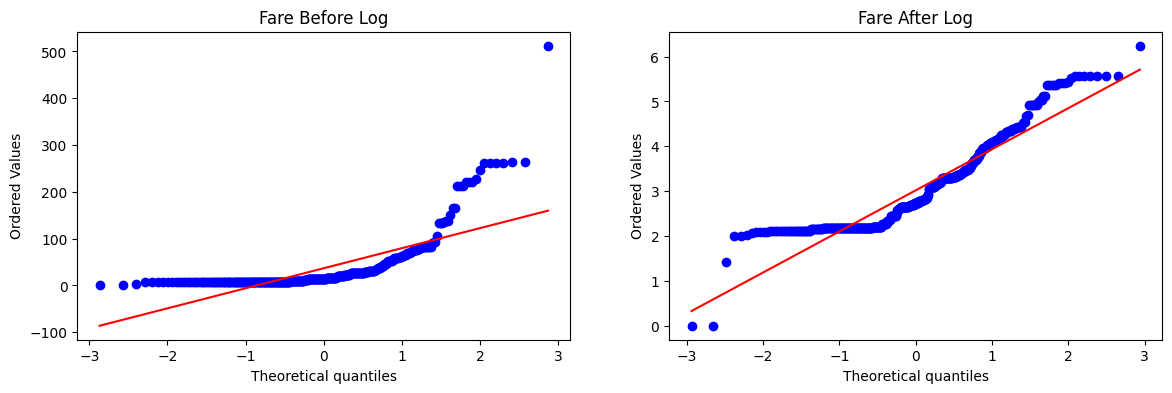

In [23]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare After Log')

plt.show()

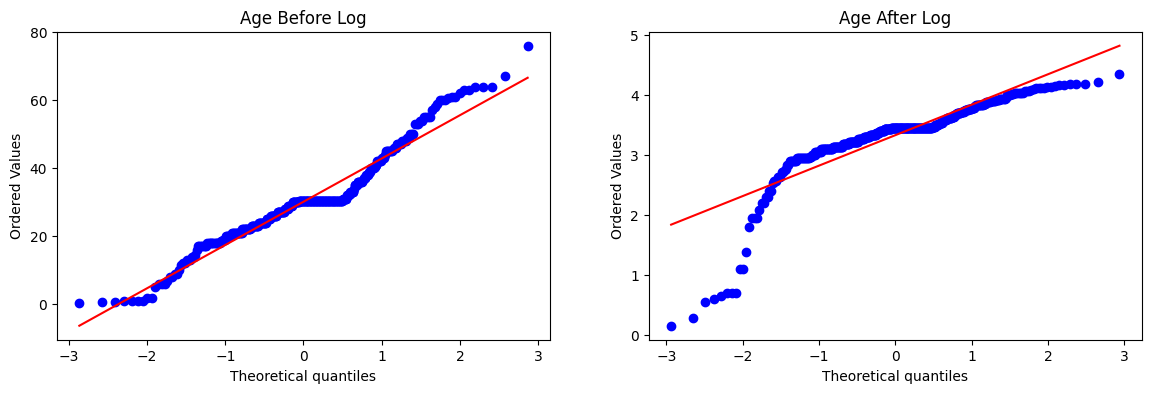

In [24]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_transformed['Age'], dist='norm', plot=plt)
plt.title('Age After Log')

plt.show()

## Means normalization of normal/good data can be contradictory also.....